# 🔥 Torch Intro  for Advance Topics in Cog. Sci. 🔥

This notebook is meant to give a short introduction to Pytorch.
**You do not have to hand in this tutorial.**

## What is PyTorch?
PyTorch is a python deep learning library that is being widely adopted both in research and industry. Like most deep learning libraries it employs GPU accelaration; unlike most deep learning libraries, it supports **dynamic** computational graphs and deep python integration, enabling easy experimentation and code inspection. It provides high-level abstractions but also allows for low-level access to its primitives. You can read more about PyTorch at the official [site](https://pytorch.org/).

## Installing PyTorch on your machine
Follow the official guidelines for installing [here](https://pytorch.org/get-started/locally/).

<div class="alert alert-block alert-info">
<b>Note:</b> If you have an nVidia GPU (Graphical Processing Unit, or Video Card), installing a CUDA version of PyTorch will allow you to utilize it, with the potential to significant speed up computation in many cases.
</div>

# This Tutorial
This tutorial will take you through PyTorch's main functionalities. It only aims to give you some insight on how to use PyTorch and is by no means a full tutorial on neural networks or PyTorch. We assume that you have some level of familiarity with python. 


# Table of Contents
1. [Tensors](#1)
    1. [Tensor Types](#1a)
    2. [Instantiating Tensors](#1b)
    3. [Basic Tensor Operations](#1c)
    4. [Exercises](#1d)
2. [Automatic Differentation](#2)
    1. [Autograd](#2a)
    2. [Exercises](#2b)
3. [Neural Networks](#3)
    1. [Custom Neural Networks](#3a)
    2. [Loss Functions](#3b)
    3. [Optimizers](#3c)
    4. [Exercises](#3d)
4. [Putting Everything Together](#4)


For a more in-depth overview of PyTorch's capabilities, refer to the [official documentation](https://pytorch.org/docs/stable/index.html) (this link will prove handy for your assignments-- keep it close and use it often).

---

#### Getting started
Let's verify your torch installation is working by trying to import it.

In [1]:
import torch

We can also specify the device used by the rest of the tutorial (either cuda or cpu, for example). If you have the cuda version installed but would rather not use it, change the snippet below.

In [4]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

print('Using {}'.format(device))

Using cuda


Ok! On to the tutorial now.

<a id='1'></a>
## 1. Tensors

A [Tensor](https://pytorch.org/docs/stable/tensors.html) is the building block of any PyTorch program; it is the abstraction that stores n-dimentional matrices, or n-ary arrays of numbers, and provides various functionalities for processing them. 

Tensors are the Torch equivalent of **Numpy arrays**, but crucially, they can also be used on a GPU (Video card). This can make your calculations a lot faster. Since they are so similar, you can actually convert most tensors to Numpy arrays (and back), but we won't need to do that so often.



<a id='1a'></a>
### A. Tensor Types

There are 16 types of Tensors, distinguished by their `dtypes` (the sort of numbers stored within them) and the `device` they can be accessed by (either GPU or CPU).



The different Tensor types and their corresponding classes are listed below:

|  | dtype | CPU Tensor Class | GPU Tensor Class |
| --- | --- | --- | --- |
| Full precision float | `torch.float32` | `torch.FloatTensor` | `torch.cuda.FloatTensor`| 
| Half precision float | `torch.float16` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |
| Double precision float | `torch.float64` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 8-bit unsigned integer | `torch.uint8` | `torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit signed integer | `torch.int8` | `torch.CharTensor` | `torch.CharTensor` |
| 16-bit signed integer | `torch.int16` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit signed integer | `torch.int32` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit signed integer | `torch.int64` | `torch.LongTensor` | `torch.cuda.LongTensor` |

We are mostly interested in **full precision floats** and **long integers** (on either device), so we can forget about the rest of them for now.

<div class="alert alert-block alert-warning">
<b>Warning:</b>
Interaction between Tensors of different devices or dtypes is not permitted (so make sure you are consistent). 
</div>

<a id='1b'></a>
### B. Instantiating Tensors
Tensors can be instantiated in a number of ways. When we want to construct a placeholder tensor of fixed dimensionality, we may simply call the appropriate class constructor.

In [6]:
my_first_long_tensor = torch.LongTensor(5)  # a vector of 5 longs
my_first_float_tensor = torch.FloatTensor(5,5)  # a 5 by 5 matrix of floats

Alternatively, we may use the abstract constructor `torch.tensor` and use the `dtype` and `device` arguments to specify its type (these default to torch.float and cpu, in the general case).

In [7]:
my_second_long_tensor = torch.tensor(5, device='cpu', dtype=torch.long) # another vector of 5 longs
my_second_float_tensor = torch.tensor((5, 5), device='cpu', dtype=torch.float)

There are a few useful short-hands for constructing tensors with commonly used values. Let's use some of them.

In [8]:
a = torch.zeros((2,3,4), device=device)  # a 2 by 3 by 4 tensor of zeroes
b = torch.ones(42, device=device)  # a vector of 42 ones
c = torch.eye(3, device=device)  # the 3 by 3 identity matrix
d = torch.rand((32,10,300), device=device)  # a 32 by 10 by 300 tensor of randoms
e = torch.arange(10, device=device)  # a vector containing the numbers 0 to 9 in ascending order

We can always query a tensor's contents, shape, dtype and device.

In [9]:
print(a.device)
print(b.dtype)
print(c)
print(d.shape)
print(e)

cuda:0
torch.float32
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
torch.Size([32, 10, 300])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')


We can also specify the values of a tensor by passing a list (of lists*) of values during its construction.

In [10]:
a = torch.tensor([[1,2,3], [4,5,6], [7,8,9]], device=device)
print(a)
print(a.shape)
print(a.dtype)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], device='cuda:0')
torch.Size([3, 3])
torch.int64


Notice that PyTorch automatically assumed that the tensor we specified should be of type long (because we only provided integers as the tensor's contents). We could of course avoid this by manually specifying the dtype. Alternatively, we can alter the dtype and/or device post-construction.

In [11]:
a = a.to(torch.float)
print(a.dtype)
a = a.to('cpu')  # or alternatively, a = a.cpu()
print(a.device)

torch.float32
cpu


Finally, a torch tensor can also be directy constructed by (or converted to) a numpy array. Converting to a numpy array only works for _cpu_ tensors.

In [12]:
import numpy as np
a_np = np.random.random((2,2))
a_torch = torch.tensor(a_np, device=device)
print(a_np)
print(a_torch)
a_np_2 = a_torch.cpu().numpy()
print(a_np_2)

[[0.32227841 0.30699415]
 [0.46769743 0.53776464]]
tensor([[0.3223, 0.3070],
        [0.4677, 0.5378]], device='cuda:0', dtype=torch.float64)
[[0.32227841 0.30699415]
 [0.46769743 0.53776464]]


In [13]:
del a_np, a_torch, a_np_2, b, c, d, my_first_long_tensor, my_first_float_tensor, my_second_long_tensor, my_second_float_tensor, e

<a id='1c'></a>
### C. Basic Tensor Operations
Tensors and their contents' are not hidden by the framework-- they are immediatelly accessible to us and we can interact with them in many ways, while being able to inspect the results of our actions. Let's walk through some of the most common usecases.

#### Indexing and Slicing
Standard python indexing and slicing applies to torch tensors. Let's remember how that works-- first we will need a random matrix to experiment with.

In [14]:
a = torch.rand((5,3), device=device)  
print(a)

tensor([[0.1718, 0.4417, 0.6540],
        [0.5888, 0.6311, 0.4998],
        [0.8931, 0.0894, 0.6956],
        [0.5364, 0.6381, 0.0902],
        [0.6364, 0.8466, 0.7197]], device='cuda:0')


<div class="alert alert-block alert-warning">
<b>Remember!</b>
Indexing starts from zero
</div>

Now let's try retrieving the 3rd item of the 1st row.

In [15]:
b = a[0][2]
print(b)

tensor(0.6540, device='cuda:0')


What if we wanted the first three rows of the matrix instead?

In [16]:
c = a[:3]
print(c)

tensor([[0.1718, 0.4417, 0.6540],
        [0.5888, 0.6311, 0.4998],
        [0.8931, 0.0894, 0.6956]], device='cuda:0')


Or its third column?

In [17]:
c = a[:, 2]
print(c)

tensor([0.6540, 0.4998, 0.6956, 0.0902, 0.7197], device='cuda:0')


Or every second element of the first column, starting from the second?

In [18]:
c = a[1::2, 0]
print(c)

tensor([0.5888, 0.5364], device='cuda:0')


But now in reverse, starting from the last?!

In [19]:
c = a[-1::-2, 0]
print(c)

ValueError: negative step not yet supported

Well, perhaps not..

#### Value Assignment
We can use the exact same scheme to assign values to tensors.

In [20]:
# Set the top left item of the matrix to zero.
a[0,0] = 0
print(a)

# Construct another random matrix of the same shape
b = torch.rand_like(a, device=device)
print(b)

# Set the second row of matrix a to be the third row of matrix b
a[1] = b[2]
print(a)

tensor([[0.0000, 0.4417, 0.6540],
        [0.5888, 0.6311, 0.4998],
        [0.8931, 0.0894, 0.6956],
        [0.5364, 0.6381, 0.0902],
        [0.6364, 0.8466, 0.7197]], device='cuda:0')
tensor([[0.2294, 0.7709, 0.5634],
        [0.1820, 0.5905, 0.4762],
        [0.2040, 0.9476, 0.7722],
        [0.1850, 0.2723, 0.3104],
        [0.6925, 0.6904, 0.9992]], device='cuda:0')
tensor([[0.0000, 0.4417, 0.6540],
        [0.2040, 0.9476, 0.7722],
        [0.8931, 0.0894, 0.6956],
        [0.5364, 0.6381, 0.0902],
        [0.6364, 0.8466, 0.7197]], device='cuda:0')


#### Element-wise Arithmetic
Element-wise operations (most importantly comparison, addition, subtraction, multiplication and division) can be applied on tensors of compatible shapes (i.e. shapes that can be [broadcasted](https://pytorch.org/docs/stable/notes/broadcasting.html)). 

Two tensors are compatible if any of the two below conditions hold:
* their shapes are the same 
* their trailing (i.e. last) N dimensions are the same (possibly excluding missing dimensions and dimensions of size 1)

Scalars (single values) are compatible with tensors of any shape. Let's see some examples.

First, some fresh tensors.

In [21]:
a = torch.zeros((2, 3, 4), device=device)  
b = torch.ones((2, 3, 4), device=device)  
c = torch.ones((3, 4), device=device)  
d = torch.ones((2, 3, 1), device=device)
e = torch.rand((4, 3, 2), device=device)

We can add a scalar to tensor a 

In [22]:
a = a + 0.3
print(a.shape)

torch.Size([2, 3, 4])


We can subtract b from a  (matching shapes)

In [23]:
f = a - b
print(f.shape)

torch.Size([2, 3, 4])


We can elementwise multiply a with c  (dimensions of c are the same as last dimensions of a)

In [24]:
g =  a * c
print(g.shape)

torch.Size([2, 3, 4])


We can elementwise divide a by d  (last dimension is 1, the rest of the dimensions match)

In [25]:
h = a / d
print(h.shape)

torch.Size([2, 3, 4])


We can elementwise raise a to d  (last dimension of d is 1, the rest of the dimensions match)

In [26]:
i = a**d
print(i.shape)

torch.Size([2, 3, 4])


And we can compare a with any of f, g, h

In [27]:
j = a == f
print(j.shape)

torch.Size([2, 3, 4])


.. but torch complains when we try to do that with e (shapes are incompatible)

In [28]:
e == a

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 2

In [29]:
del a, b, c, d, e, f, g, h, i, j

If in doubt for what any of the element-wise operators actually do, try them out below on some tensors of your own making.

In [33]:
a = torch.rand((2,3,4), device=device)
b = torch.rand((2,3,1), device=device)

print(a)
print(b)

tensor([[[0.2386, 0.9373, 0.5118, 0.2789],
         [0.6266, 0.3850, 0.6063, 0.0601],
         [0.4554, 0.3331, 0.3317, 0.6675]],

        [[0.3834, 0.8169, 0.5280, 0.3134],
         [0.3152, 0.5670, 0.1548, 0.4367],
         [0.4928, 0.4303, 0.1936, 0.1484]]], device='cuda:0')
tensor([[[0.8321],
         [0.0687],
         [0.0238]],

        [[0.3244],
         [0.4783],
         [0.0120]]], device='cuda:0')


In [34]:
del a, b

#### Linear Algebra
Tensor algebra of course goes well beyond elementwise operations- matrix multiplication is the bread and butter of neural networks.  Quite often, we have an input vector $\mathbf{x}$, and then we want to learn weights $W$ that transform that input to some output that we want. So we better get familiar with how pyTorch does it.

As usual, we begin by instantiating our matrices. Matrix multiplication is defined between matrices A and B of shapes [M, N] and [N, O] respectively and yields a matrix C of shape [M, O]. The torch function that implements matrix multiplication is `torch.mm`.

In [35]:
A = torch.rand([5,3], device=device)
B = torch.rand([3,8], device=device)
C = torch.mm(A, B)  # or alternatively, C = A @ B
print(C.shape)

torch.Size([5, 8])


What if we had a large numbers (i.e. a batch) of matrices A to each be multiplied with a matching B? We can use `torch.bmm` for efficient batch matrix multiplication.

<div class="alert alert-block alert-info">
<b>Tip:</b> Rather than writing slow and ugly `for` loops, employ array programming to write your machine learning code. This will make it much more concise and dramatically more efficient.
</div>

In [36]:
bA = torch.rand([128, 5, 3], device=device)
bB = torch.rand([128, 3, 8], device=device)
bC = torch.bmm(bA, bB)  # bC = bA @ bC also works here!
print(bC.shape)

torch.Size([128, 5, 8])


<div class="alert alert-block alert-warning">
<b>Warning:</b>
Be careful not to confuse matrix multiplication with element-wise multiplication!
`A*B` is never the same as `A@B`.
</div>

#### Shape Manipulation
As we have seen, what we can do with tensors is largely dictated by their shapes. Adjusting a tensor's shape to allow for broadcasting or batching is therefore often necessary. The following functions should suffice for the bulk of shape manipulation tasks you might encounter.

Tensor transposition is the generalization of 2-D matrix transposition. Since there are now more than 2 dimensions, we additionally need to specify the transposed dimensions. Take for instance a tensor of shape [M, N, O]. Converting it to a tensor of shape [N, M, O] requires transposing the first and second dimensions.

In [58]:
A = torch.rand([128, 5, 3], device=device)
A = A.transpose(0, 1)
print(A.shape)

torch.Size([5, 128, 3])


We may also choose to create a reshaped view of a tensor; for instance we may collapse two or more tensor dimensions into one..

In [59]:
A = torch.rand([128, 5, 3], device=device)
A_collapsed = A.view(A.shape[0]*A.shape[1], A.shape[-1])
print(A_collapsed.shape)

torch.Size([640, 3])


.. or expand one dimension into two or more

In [60]:
A_expanded = A_collapsed.view(128, 5, 3)
print(A_expanded.shape)
print(A_expanded)

torch.Size([128, 5, 3])
tensor([[[0.6591, 0.8866, 0.3036],
         [0.2363, 0.1022, 0.8412],
         [0.7438, 0.1678, 0.9511],
         [0.6113, 0.9370, 0.5934],
         [0.9159, 0.6850, 0.0070]],

        [[0.3728, 0.1742, 0.3493],
         [0.7893, 0.6400, 0.5702],
         [0.7411, 0.2011, 0.4605],
         [0.0300, 0.2157, 0.2347],
         [0.2305, 0.2200, 0.3500]],

        [[0.0113, 0.8975, 0.5257],
         [0.4355, 0.4705, 0.2711],
         [0.9310, 0.5822, 0.3792],
         [0.8754, 0.5549, 0.7212],
         [0.6158, 0.1019, 0.9796]],

        ...,

        [[0.0619, 0.3336, 0.2936],
         [0.6692, 0.0070, 0.9020],
         [0.7992, 0.4275, 0.4420],
         [0.3937, 0.1163, 0.2640],
         [0.3881, 0.9697, 0.1579]],

        [[0.8310, 0.1916, 0.7270],
         [0.7758, 0.3579, 0.7946],
         [0.6948, 0.8639, 0.6455],
         [0.1307, 0.5416, 0.2931],
         [0.1136, 0.9717, 0.4811]],

        [[0.3244, 0.8516, 0.3008],
         [0.8804, 0.3067, 0.8399],
       

Let's convince ourselves that the back and forth between dimensions has left our tensor unaffected. First let's elementwise compare A with A_expanded.

comp = A == A_expanded
print(comp)

It seems to be okay! But what if there is a zero somewhere in there? Python's `all` and `any` may be used directly on torch bools to help us here.

In [41]:
print(all([all(row) for matrix in comp for row in matrix]))

True


Views are useful, but as the name suggests they only change our view of a tensor. Different views of a tensor have the same number of elements; the view is just changing in what order these are read.

For cases where we would like to repeat a tensor across one or more of its axes (actually creating a larger tensor), we can use the function of the same name. Let's consider a tensor of shape [M, N] which we would like to turn into a tensor that repeats itself K times across the first dimension (i.e. a tensor of shape [K $\cdot$ M, N].

In [42]:
A = torch.rand([5, 12], device=device)
A_repeat = A.repeat(3, 1)  # note that we are specifying the number of repeats per dimension
print(A_repeat.shape)

torch.Size([15, 12])


#### Combining Tensors
Sometimes we may want to construct a big tensor out of two small ones. There's a few ways to accomplish that, but the most reliable one is through `torch.cat` 🐈 (shorthand for concatenate).

Two tensors may be concatenated if they agree on all their dimensions, except for the concatenation dimension.

In [43]:
A = torch.rand([4,2], device=device)
B = torch.rand([1,2], device=device)
C = torch.cat((A, B), dim=0)
print(C.shape)

torch.Size([5, 2])


In [61]:
del A, B, C, comp, A_repeat, A_expanded, A_collapsed, bA, bB, bC

NameError: name 'comp' is not defined

---

<a id='1d'></a>
### Exercises
It might be a good idea to take a short break here and recap on what we've seen before moving further. The mini-exercises below should help you test your grasp of this section.

Construct a tensor $A$ of shape [10, 300] containing random floats, and a tensor $B$ of the same shape where all its elements are equal to $\pi$.

In [68]:
import math
A = torch.rand((10, 300), device=device)
B_prep = torch.tensor((10, 300), device=device)
B = B_prep.new_full((10, 300), math.pi, dtype=torch.float, device=device)


Compute $C = AB^T$, the matrix multiplication of $A$ with the transpose of $B$ and $D = A\cdot B$, their elementwise multiplication.

In [69]:
B_T = B.transpose(1, 0)
C = A @ B_T
D = A*B

Try comparing $C$ with $D$. Are they comparable? Are they equal? What is the dtype of their comparison?

In [49]:
comp_cd = C == D

RuntimeError: The size of tensor a (10) must match the size of tensor b (300) at non-singleton dimension 1

<i> <b>Answer:</b> Since $C$ and $D$ do not share their first dimension, they are incomparable. </i>

Multiply $A$ by 4 to create $F$. Now set all elements of $F$ that are above $\pi$ to zero.


_Hint 1_: You can index a tensor with a boolean tensor of the same dimensionality

_Hint 2_: You can set multiple indexed elements to a single value at once

In [70]:
F = A*4
Fpi = B > F
F = Fpi.float()*F

The incomplete function below implements matrix multiplication with a for loop. Complete the function and call it with your $A$ and $B^T$ matrices as its arguments. The result should be the same as the matrix $C$ you computed before (with room for some numerical inaccuraccy)

Note: You can use `torch.sum()` to compute the sum of a tensor (optionally specifying across which dimension)

<div class="alert alert-block alert-info">
<b>Note:</b> [Type Hints](https://www.python.org/dev/peps/pep-0484/#rationale-and-goals) may be used in python function and variable declarations to give them a type signature. These type signatures are not strict (you can still bypass them), but they can help you organize your code. Type hints of incomplete functions given during assignments will inform you of what we expect your function to accept and return.
</div>

In [72]:
def my_mm(A: torch.FloatTensor, B: torch.FloatTensor) -> torch.FloatTensor:
    assert A.shape[1] == B.shape[0]
    assert (len(A.shape) == len(B.shape) == 2)
    C = torch.zeros((A.shape[0], B.shape[1]), device=device)
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(B.shape[0]):
                C[i, j] += A[i][k] * B[k][j]
    return C
    
E = my_mm(A, B.transpose(1,0))

assert torch.sum(torch.abs(E - C))/(E.shape[0]*E.shape[1]) < 1e-4  # make sure the mean absolute difference between the two results is below 0.0001

Create a 2-dimensional tensor $S$ that consists by an instance of $A$ followed by two instances of $B$ followed by an instance of $A$ across its first dimension. What is the shape of $S$?

In [81]:
AB = torch.cat((A, B), dim=0)
ABB = torch.cat((AB, B), dim = 0)
S = torch.cat((ABB, A), dim = 0)
print(S.shape)

torch.Size([40, 300])


Reshape $S$ into a tensor of shape [20, 2, 300]. 
Then transpose this into a tensor of shape [2, 300, 20].

In [82]:
S = S.view(20, 2, 300)
S = S.permute(1, 2, 0)
print(S.shape)

torch.Size([2, 300, 20])


In [83]:
del A, B, C, D, E, F, S

---

<a id='2'></a>
## 2. Automatic Differentation and Neural Networks
We have so far seen some of pyTorch's computational capabilities; its GPU accelaration and multitude of high level functions make it suitable for array processing and vector arithmetic. But pyTorch is more than a faster numpy; its key components, and where most of the magic happens, are in its automatic differentiation mechanics and neural network libraries.

<a id='2a'></a>
### A. Autograd
Each torch tensor carries a flag around with it, `requires_grad`, which establishes whether that tensor requires gradient computation. 

By default, tensors do not require grad unless specified. Whenever a tensor that requires grad assumes a role in the construction of another tensor, the new tensor also requires grad.
By dynamically tracking dependencies in the evolving computation graph, and utilizing this flag, torch is able to inform itself on which tensors need to be updated by gradient descent, and which do not (naturally, only tensors for which gradients arecomputed will be updated).

Practically, by setting `requires_grad` to `False` we can _freeze_ (parts of) our functions, making them static.

Let's see this in action by modeling a simple linear transformation $f(x): Ax$ from $x \in \mathbb{R}^5$  to $y \in \mathbb{R}^7$:

<div class="alert alert-block alert-info">
<b>Note:</b> Recall that a matrix of shape [M, N] is a linear map __from__ $\mathbb{R}^N$ __to__ $\mathbb{R}^M$.
</div>

In [84]:
A = torch.rand((7, 5), device=device) 

def f(x: torch.FloatTensor) -> torch.FloatTensor:
    return A@x 

Let's test our function for some $x$, and check whether the result requires grad.

In [85]:
x = torch.rand(5, device=device)
y = f(x)
print(y)
print(y.requires_grad)

tensor([1.3883, 0.6959, 1.4554, 0.8178, 1.5299, 1.1428, 1.3271],
       device='cuda:0')
False


It does not; what if the parameters of our function $f$ were trainable though?

In [86]:
A.requires_grad = True
y = f(x)
print(y.requires_grad)

True


The output of our linear transformation is now also trainable!


---

<a id='2b'></a>
### Exercises
Answer the next questions before you proceed.

Model an affine transformation $g(x) = Ax + \beta$ from $x \in \mathbb{R}^3$ to $y \in \mathbb{R}^{12}$ as the composition of two functions, $f_1(x) = Ax$, $f_2(x) = x + \beta$, such that $A$ requires grad but $\beta$ does not.

<div class="alert alert-block alert-info">
<b>Note:</b> You can use `requires_grad: bool` as an optional argument during tensor construction. Can you guess its default value?
</div>

In [90]:
A = torch.rand((12, 3), device=device, requires_grad=True)
beta = torch.rand((3, 12), device=device)

def f_1(x: torch.FloatTensor) -> torch.FloatTensor:
    return A@x

def f_2(x: torch.FloatTensor) -> torch.FloatTensor:
    return x + beta

x = torch.rand(3, device=device)

w = f_1(x)
y = f_2(w)

Try to figure out the answers on your own before checking the code. 

Let's assume $x$ is a fixed data sample, therefore does not require grad (we don't usually want to fit our data, but the function applied on the data!)

If $A$ requires grad but $\beta$ doesn't, does $w$ require grad? Does $y$?

<i><b>Answer:</b> Both $w$ and $y$ require grad in this instance. $A$ requires grad and is a component of $w$, which therefore requires grad. Since $w$ is a component of $y$, that means that $y$ also requires grad.</i>

If $\beta$ requires grad but $A$ doesn't, does $w$ require grad? Does $y$?

<i><b>Answer:</b> In this instance, only $y$ requires grad, since $w$ has no components that require grad.</i>

What would that mean for $A$ and $\beta$ during gradient descent?

<i><b>Answer:</b> This would mean that $\beta$ will have better optimised solutions than $A$, since the function that has $A$ as an input doesn't require grad.</i>

Use the code to verify your answers.


In [91]:
print(w.requires_grad)
print(y.requires_grad)

True
True


In [92]:
A.requires_grad = False
beta.requires_grad = True

w = f_1(x)
y = f_2(w)

print(w.requires_grad)
print(y.requires_grad)

False
True


In [93]:
del A, beta, x, y, w, f, f_1, f_2

---

<a id='3'></a>

## 3. Neural Networks
We are very close to defining our first neural network in pytorch. Pytorch includes a powerful neural network library, `torch.nn`, which allows us to create our own custom network flows, use highly optimized off-the-shelf implementations of most standard kinds of networks and compose different networks together.

<a id='3a'></a>
### A. Custom Neural Networks
You have already implemented an affine transformation; a shallow feedforward network is simply such a transformation followed by a non-linearity. For the sake of familiarizing ourselves with custom torch networks, we will go through the process of defining such a network from scratch (you won't normally be doing this, but it's still beneficial to have an idea of what's happening at the low level before proceeding to the high level).

The building block for a torch network is the `torch.nn.Module` class; we need to define our networks as objects inheriting that class. If we do so, we only need to implement two functions: `__init__()` and `forward()`. The first is responsible for registering the internal variables of our network, while the second specifies the kind of computation it actually performs.

Let's see these in practice; we will define a shallow feedforward network implementing $f(x) = \sigma(Wx + \beta)$ from any input dimension to any output dimension, where $\sigma$ the sigmoid activation.

In [94]:
class my_first_network(torch.nn.Module):
    def __init__(self, in_features: int, out_features: int, device: int) -> None:
        super(my_first_network, self).__init__()  # this is important! do not forget to call this
        self.device = device
        self.W = torch.nn.Parameter(torch.rand(out_features, in_features, device=self.device))
        self.beta = torch.nn.Parameter(torch.rand(out_features, device=self.device))
        
    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        return torch.sigmoid(self.W@x + self.beta)

<div class="alert alert-block alert-info">
<b>Note:</b> Notice the use of torch.nn.Parameter. Wrapping the tensors that are parametric to our network's function in torch.nn.Parameter is crucial as it informs torch that these tensors need to be stored, updated and shared between different function calls.
</div>

We can now test our first network class by instatiating an actual network and passing a random tensor through it.

In [95]:
f = my_first_network(in_features=3, out_features=12, device=device)
x = torch.rand(3, device=device)
y = f(x)  # convenience for f.forward(x) -- the __call__() method of torch.nn.Module calls forward()
print(y)

tensor([0.5824, 0.7101, 0.8242, 0.7689, 0.7724, 0.8335, 0.8014, 0.6486, 0.8015,
        0.7475, 0.7989, 0.6881], device='cuda:0', grad_fn=<SigmoidBackward>)


Since we have the abstraction for one layer, what's stopping us from instantiating a second network and composing the two into a deep network?

In [97]:
class my_first_deep_network(torch.nn.Module):
    def __init__(self, in_features: int, intermediate_features: int, out_features: int, device: str) -> None:
        super(my_first_deep_network, self).__init__()
        self.device = device
        self.n_1 = my_first_network(in_features=in_features, out_features=intermediate_features, device=self.device)
        self.n_2 = my_first_network(in_features=intermediate_features, out_features=out_features, device=self.device)
        
    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        return self.n_2(self.n_1(x))
    
g = my_first_deep_network(in_features=3, intermediate_features=12, out_features=5, device=device)
y = g(x)
print(y)

tensor([0.9973, 0.9979, 0.9901, 0.9787, 0.9925], device='cuda:0',
       grad_fn=<SigmoidBackward>)


Very easy, right?

Except we just did it the hard way! We could have used torch's pre-made `torch.nn.Linear`, the existing abstraction for single feedforward layers, and `torch.nn.Sequential`, the abstraction for composing sequences of networks. 

How would that have looked like?

In [106]:
h = torch.nn.Sequential(
    torch.nn.Linear(in_features=3, out_features=12),
    torch.nn.Sigmoid(), # notice the use of the class rather than the function (i.e. Sigmoid() rather than sigmoid())
    torch.nn.Linear(in_features=12, out_features=5), 
    torch.nn.Sigmoid()  
).to(device)  # notice the device conversion; our network needs to live on the same device as our input

y = h(x)
print(y)

tensor([0.5834, 0.4453, 0.5662, 0.4005, 0.4816], device='cuda:0',
       grad_fn=<SigmoidBackward>)


Even easier!

<div class="alert alert-block alert-info">
<b>Note:</b> When composing networks using the `Sequential` abstraction, you should make sure that each network's expected input shape matches the output shape of the previous network.
</div>

So, why ever define our own networks if torch can do it for us? The answer is that very often (and very soon!) it might be the case that you'll need to write your own, potentially complex, computation flow, which won't necesserily be possible to rephrase as simple layer stacking.

In [107]:
del x, y, h, g, f, my_first_network, my_first_deep_network

<a id='3b'></a>
### B.  Loss Functions

We have seen how to construct parametric, trainable functions and networks. Requiring a gradient and having a gradient are two different things, however. To obtain the gradients of our trainable parameters we need a loss function. The loss function is an indicator of how far off the network's output (prediction) is from the actual truth. Applying the chain rule, we may differentiate the loss value w.r.t. the model's parameters, populating the tensors' gradients in the process. 

As with networks, torch provides implementations for the commonly used loss functions but also allows us to write our own. 

We will only experiment with an existing loss function, but first we need to construct some data to play with-- we can create a synthetic data set of pairs $(x_i, y_i)$ where $x_i$ is a random number and $y_i = 3 \cdot x_i - 2$

In [108]:
x = torch.rand((100, 1), device=device)  # a tensor of shape 100, 1, i.e. 100 data points each of dimensionality 1
y = 3 * x - 2

Time to employ a linear network.

<div class="alert alert-block alert-warning">
<b>Warning:</b>
Don't mix up input/output dimensionality and number of data samples! 
</div>

In [109]:
f = torch.nn.Linear(in_features=1, out_features=1).to(device)
prediction = f(x)

Now to define our loss function:

In [110]:
loss_fn = torch.nn.MSELoss()

Note that each element of our batch (i.e. each of the 100 data samples) has its own MSE w.r.t. to its corresponding output. These unique losses are averaged into a single scalar by the loss function.

In [111]:
loss = loss_fn(y, prediction)
print(loss)

tensor(2.0163, device='cuda:0', grad_fn=<MeanBackward0>)


Now that we have computed the loss, we may use it to populate the parameters' gradients via a backward pass. This is automagically done by a simple call of `backward`. 🧙

In [112]:
loss.backward()

Torch provides a few different loss functions, each for a particular usecase (the task and your output layer's activation function). Note that particular loss functions are already implementing the network's output activation internall. Refer to the [documentation](https://pytorch.org/docs/stable/nn.html#loss-functions) for a detailed overview. In most cases, the cheat-sheet below should contain the answer.

<div class="alert alert-block alert-info">
<b>Tip:</b> At a loss on which loss to use? Use this cheat-sheet!
</div>

| Task | Activation | Loss Function |
| --- | --- | --- | --- |
| K-class Classification | - | CrossEntropyLoss |
| K-class Classification | LogSoftmax | NLLLoss |
| K-class, Multi-Label Classification | - | BCEWithLogitsLoss |
| K-class, Multi-Label Classification | LogSigmoid | BCELoss |
| Continuous Regression | - | MSELoss |

<a id='3c'></a>

### C.  Optimizers
Our struggles are slowly coming to an end. We have made a trainable network, we have computed the loss given the true output, and we have used the loss to populate the parameter gradients. The final thing to do is to use these gradients in order to update the parameter values. 
This is managed by an `Optimizer`. Gradient based optimizers are the norm for training neural networks; all of them are variants of stochastic gradient descent. Torch provides implementations of the classic optimizers. Regardless of which one of them is your favourite, the process always involves the same steps:
1. Initiate the optimizer by letting it know which parameters it is going to be responsible for
2. Iterate over your data, and:
    2. Compute the loss
    3. Back-propagate
    4. Perform an optimization step
    5. Zero out the gradients (so that they don't accumulate over optimization steps)

Let's see them in action on our toy network and synthetic dataset.

In [113]:
opt = torch.optim.Adam(f.parameters())  # initiate optimizer
for t in range(5001):  # iterate
    prediction = f(x)  # predict 
    loss = loss_fn(prediction, y)  # compute loss
    loss.backward()  # backpropagate
    opt.step()  # optimize
    opt.zero_grad()  # reset gradients
    if t%500 == 0:
        print('Iteration {} loss: {}'.format(t, loss.item()))

Iteration 0 loss: 2.0163414478302
Iteration 500 loss: 0.9897440075874329
Iteration 1000 loss: 0.6848120093345642
Iteration 1500 loss: 0.5138974189758301
Iteration 2000 loss: 0.36354389786720276
Iteration 2500 loss: 0.23887977004051208
Iteration 3000 loss: 0.1442098766565323
Iteration 3500 loss: 0.07849932461977005
Iteration 4000 loss: 0.03743081912398338
Iteration 4500 loss: 0.014989814721047878
Iteration 5000 loss: 0.004753648303449154


Congratulations! You have trained your first torch network! 🎉

---

<a id='3d'></a>

### D. Exercises

Before we move on to a somewhat more realistic problem, it might be a good idea to get further acquainted with the basics. 

Let's take a quick look at a few different non-linear activations first.

Use `arange` to construct a float tensor $x$ of values $0 \dots 1000$ in ascending order. Then element-wise subtract $500$ and divide by $100$ to get a tensor of values $-5 \dots 5$.

In [155]:
x = torch.arange(1001, dtype=torch.float, device=device)
x = (x-500)/100

Construct the tensors $s = \sigma(x)$, $t = tanh(x)$ and $r = ReLU(x)$.

In [156]:
s = torch.sigmoid(x)
t = torch.tanh(x)
r = torch.relu(x)

Now we can convert these to numpy arrays and plot the results. 

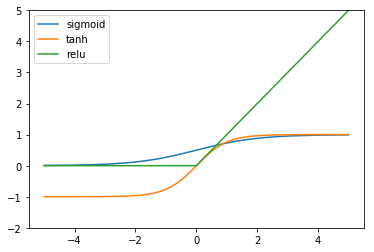

In [157]:
from matplotlib import pyplot as plt
plt.plot(x.cpu().numpy(),s.cpu().numpy())
plt.plot(x.cpu().numpy(),t.cpu().numpy())
plt.plot(x.cpu().numpy(),r.cpu().numpy())
plt.ylim((-2, 5))
plt.legend(['sigmoid', 'tanh', 'relu'])
plt.show()

Let's practice some more by solving the infamous XOR problem with a small deep network. 

In [158]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], device=device, dtype=torch.float)
Y = torch.tensor([0, 1, 1, 0], device=device, dtype=torch.float)

Use `torch.nn.Sequential` to create a minimal deep network with 1 output dimension and 2 intermediate dimensions. Use ReLU as your intermediate layer activation.

In [159]:
f = torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=4),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=4, out_features=1)
).to(device)

Instantiate an adam optimizer for your network, and `BCEWithLogitsLoss` as your loss function.

In [162]:
loss_fn = torch.nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(f.parameters(), lr=0.01)

Perform 5000 iterations of training, printing the loss as you go.

In [163]:
for t in range(5001):  # iterate
    P = f(X)  # predict 
    loss = loss_fn(P, Y.view(4,1))  # compute loss
    loss.backward()  # backpropagate
    opt.step()  # optimize
    opt.zero_grad()  # reset gradients
    if t%500 == 0:
        print('Iteration {} loss: {}'.format(t, loss.item()))

Iteration 0 loss: 0.015074608847498894
Iteration 500 loss: 0.0006085228524170816
Iteration 1000 loss: 0.00020624265016522259
Iteration 1500 loss: 0.00010271600331179798
Iteration 2000 loss: 6.0315454902593046e-05
Iteration 2500 loss: 3.874115282087587e-05
Iteration 3000 loss: 2.628477886901237e-05
Iteration 3500 loss: 1.8447201000526547e-05
Iteration 4000 loss: 1.3321408914634958e-05
Iteration 4500 loss: 9.77503714238992e-06
Iteration 5000 loss: 7.301499408640666e-06


You might encounter a shape error here. If you do, don't panic! Read it, understand what the problem is and remember `.view()`.

Is the loss improving? If not, try toying around with the intermediate layer's width, the optimizer and its learning rate until your network can solve the problem.

In [164]:
del f, loss_fn, opt, X, Y

<a id='3d'></a>
## 4. Putting Everything Together
Time to hone our newly acquired torch skills! 

We will now put everything together and write an actual network on a real task. The code below is mostly complete, but some parts here and there are missing. You will be asked to fill those in, so pay attention!

First, construct a two-layer network that implements the function $f: \mathbb{R}^{300} \to \mathbb{R}$, such that:

$f(x) = W_2(ReLU(W_1x + \beta_1) + \beta_2$

where:
* $W_1 \in \mathbb{R}^{100, 300}$
* $W_2 \in \mathbb{R}^{1, 100}$ 
* $ \beta_1 \in \mathbb{R}^{100}$ 
* $\beta_2 \in \mathbb{R}^1$


using `torch.nn.Sequential` 

In [5]:
f = torch.nn.Sequential(
    torch.nn.Linear(in_features=300, out_features=100),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=100, out_features=1),
).to(device)

Let's make some use of this network on real data.
We are going to open a data dump containing ~5500 baby names. Each name is associated with a label (either 0 for male, or 1 for female), but also a 300-dimensional vector. Representing words as dense vectors is standard practice in NLP; you will learn more about these vectors in your first assignment. For now, we will simply use them in an attempt to teach the network to distinguish between boy and girl babies given their names, while writing some useful code in the process. 👶

In [10]:
import pickle
with open('name_data.p', 'rb') as file:
    names, vectors, labels = pickle.load(file)

What do our data look like? Run the snippet below a couple of times to get an impression.

In [26]:
print(np.random.permutation(list(zip(names, labels)))[0:20])

[['Noel' '0']
 ['Danny' '1']
 ['Flem' '0']
 ['Mabel' '1']
 ['Birdie' '1']
 ['Vince' '0']
 ['Stephie' '1']
 ['Laurance' '0']
 ['Briney' '1']
 ['Josefina' '1']
 ['Bernard' '0']
 ['Tabor' '0']
 ['Ame' '1']
 ['Clyde' '0']
 ['Darci' '1']
 ['Matteo' '0']
 ['Spenser' '0']
 ['Lynne' '1']
 ['Regan' '0']
 ['Katee' '1']]


`vectors` is a list of numpy arrays, and `labels` is a list of integers. We will need to convert them to lists of FloatTensors. Since that is a lot of data, it is unlikely for them to all fit in the GPU, so we will use the RAM as a temporary storage regardless of your currently used device.

In [27]:
vectors = list(map(lambda x: torch.tensor(x, dtype=torch.float), vectors))  # or alternatively, vectors = [torch.tensor(vector) for vector in vectors]
labels = list(map(lambda x: torch.tensor(x, dtype=torch.float), labels))  

Training on your entire dataset is bad practice; we should split the data into a training set and a validation set. We could either do it manually, or let `sklearn` do it for us.

In [28]:
from sklearn.model_selection import train_test_split
names_train, names_val, X_train, X_val, Y_train, Y_val = train_test_split(names, vectors, labels, test_size=0.2)
assert len(X_train) == len(Y_train) == len(names_train)
assert len(X_val) == len(Y_val) == len(names_val)

Now that we have split the data, we may convert them from a list of tensors onto a big tensor. We could do that by using `view()` to expand the first dimension of each vector and then `cat()` to merge them, but an easier shorthand is `stack()`.

In [29]:
X_train = torch.stack(X_train)
X_val = torch.stack(X_val)
Y_train = torch.tensor(Y_train)
Y_val = torch.tensor(Y_val)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

torch.Size([4310, 300])
torch.Size([1078, 300])
torch.Size([4310])
torch.Size([1078])


Now that we have our tensors in a sensible format, we may construct a Dataset (a storage unit for our data) and a DataLoader (a wrapper responsible for shuffling the data, iterating through them and converting them to batches).

In [30]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val, Y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # no need to shuffle the validation data

Let's begin and immediately stop an iteration through the training dataloader to get an idea of what's going on.

In [31]:
for batch_x, batch_y in train_dataloader:
    print(batch_x.shape)
    print(batch_x.dtype)
    print(batch_y.shape)
    print(batch_y.dtype)
    break


torch.Size([32, 300])
torch.float32
torch.Size([32])
torch.float32


Looking good; batch_x is 32 300-dimensional vectors, and batch_y is 32 values.

`train_batch()` is a function that takes a network, a batch of inputs, a batch of outputs, a loss function and an optimizer, runs the training routine on that batch and returns the loss value of that batch

In [32]:
from typing import Callable, List

def train_batch(network: torch.nn.Module,  # the network
                X_batch: torch.FloatTensor,  # the X batch
                Y_batch: torch.LongTensor,   # the Y batch
                # a function from a FloatTensor (prediction) and a FloatTensor (Y) to a FloatTensor (the loss)
                loss_fn: Callable[[torch.FloatTensor, torch.FloatTensor], torch.FloatTensor],  
                # the optimizer
                optimizer: torch.optim.Optimizer) -> float:
    
    network.train()
    
    prediction_batch = network(X_batch)  # forward pass
    batch_loss = loss_fn(prediction_batch.view(-1), Y_batch)  # loss calculation
    batch_loss.backward()  # gradient computation
    optimizer.step()  # back-propagation
    optimizer.zero_grad()  # gradient reset
    return batch_loss.item()

<div class="alert alert-block alert-info">
<b>Note:</b> Several network components (e.g. dropout units) may behave differently during training and validation. We use `.train()` to inform the network that we are in training time.
</div>

<div class="alert alert-block alert-warning">
<b>Warning:</b>
The `batch_loss` tensor requires gradient (why?). It is important to return its contents with `.item()` rather than the tensor itself, otherwise we risk memory leak because of the accumulated gradient tracking.
</div>

`train_epoch()` is a function that takes a network, the training dataloader, a loss function and an optimizer. It iterates through the dataloader and is responsible for calling `train_batch()`.

In [33]:
def train_epoch(network: torch.nn.Module, 
                # a list of data points x
                dataloader: DataLoader,
                loss_fn: Callable[[torch.FloatTensor, torch.FloatTensor], torch.FloatTensor],
                optimizer: torch.optim.Optimizer, 
                device: str) -> float:
    
    loss = 0.
    
    for i, (x_batch, y_batch) in enumerate(dataloader):
        x_batch = x_batch.to(device)  # convert back to your chosen device
        y_batch = y_batch.to(device)
        loss += train_batch(network=network, X_batch=x_batch, Y_batch=y_batch, loss_fn=loss_fn, optimizer=optimizer)
    loss /= (i+1) # divide loss by number of batches for consistency 
        
    return loss

Your turn; fill in the missing parts of `eval_batch()`, a function that takes a network, a batch of inputs, a batch of outputs and a loss function, and computes the loss of that batch.

In [34]:
def eval_batch(network: torch.nn.Module,  # the network
                X_batch: torch.FloatTensor,  # the X batch
                Y_batch: torch.LongTensor,   # the Y batch
                loss_fn: Callable[[torch.FloatTensor, torch.LongTensor], torch.FloatTensor]) -> float:
    
    network.eval()
    
    with torch.no_grad():
        prediction_batch = network(X_batch)  # forward pass
        batch_loss = loss_fn(prediction_batch.view(-1), Y_batch)  # loss calculation
        
    return batch_loss.item()

<div class="alert alert-block alert-info">
<b>Note:</b> Notice that we use `.eval()` to inform the network we are in validation time. Notice also the `no_grad()` context; this is telling torch that it doesn't need to bother with gradient tracking momentarily, providing a significant speed-up for the current session.
</div>

`eval_epoch()` is basically the same as `train_epoch()`, aside the lack of an optimizer.

In [35]:
def eval_epoch(network: torch.nn.Module, 
                # a list of data points x
                dataloader: DataLoader,
                loss_fn: Callable[[torch.FloatTensor, torch.LongTensor], torch.FloatTensor],
                device: str) -> float:
    
    loss = 0.
    
    for i, (x_batch, y_batch) in enumerate(dataloader):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss += eval_batch(network=network, X_batch=x_batch, Y_batch=y_batch, loss_fn=loss_fn)
    loss /= (i+1)
        
    return loss

We can also make an auxilliary `infer_batch()` function; the forward pass gives us the final layer's output, but we might just be interested in the predicted class rather than its probability.

In [36]:
def infer_batch(network: torch.nn.Module, 
                batch_x: torch.FloatTensor, 
                device: str) -> torch.LongTensor:
    
    # first apply the sigmoid activation (since it is implemented by the loss function rather than the network itself)
    sigm = torch.sigmoid(network(batch_x.to(device)))
    # round the result
    classes = torch.round(sigm)
    # detach it from the computation graph (we no longer care about its gradients)
    classes = classes.detach()
    # cast the result into a LongTensor and return
    return classes.to(torch.long)

One last thing before we can finally train; we need a loss function and an optimizer. 

In [37]:
opt = torch.optim.Adam(f.parameters(), lr=1e-05)
loss_fn = torch.nn.BCEWithLogitsLoss(reduction='mean')

In [38]:
NUM_EPOCHS = 100

train_losses = []
val_losses = []

for t in range(NUM_EPOCHS):
    train_loss = train_epoch(f, train_dataloader, optimizer=opt, loss_fn=loss_fn, device=device)
    val_loss = eval_epoch(f, val_dataloader, loss_fn, device=device)
    
    print('Epoch {}'.format(t))
    print(' Training Loss: {}'.format(train_loss))
    print(' Validation Loss: {}'.format(val_loss))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

Epoch 0
 Training Loss: 0.6862717169302481
 Validation Loss: 0.6812330852536594
Epoch 1
 Training Loss: 0.6782493326399062
 Validation Loss: 0.6730842993539923
Epoch 2
 Training Loss: 0.6704386163640905
 Validation Loss: 0.6650347937555874
Epoch 3
 Training Loss: 0.6624353046770449
 Validation Loss: 0.6568203498335445
Epoch 4
 Training Loss: 0.6542156060536702
 Validation Loss: 0.6482703247491051
Epoch 5
 Training Loss: 0.6457473896167897
 Validation Loss: 0.6394237227299634
Epoch 6
 Training Loss: 0.636907422542572
 Validation Loss: 0.6301699158023385
Epoch 7
 Training Loss: 0.6276489010563603
 Validation Loss: 0.6205104063538944
Epoch 8
 Training Loss: 0.618245937206127
 Validation Loss: 0.6104666660813725
Epoch 9
 Training Loss: 0.6082376528669287
 Validation Loss: 0.6002690914799186
Epoch 10
 Training Loss: 0.5982060767986156
 Validation Loss: 0.5897014772190767
Epoch 11
 Training Loss: 0.5878971170496058
 Validation Loss: 0.5790153040605432
Epoch 12
 Training Loss: 0.5774155391587

We may plot the losses to get an idea of what the learning curve looks like.

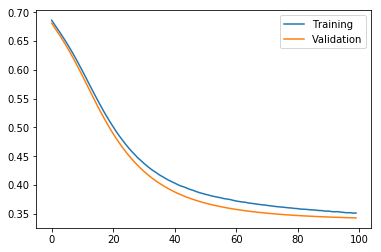

In [40]:
from matplotlib import pyplot as plt
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['Training', 'Validation'])
plt.show()

And let's bring this to an end by labeling all of our validation data and printing the results.

In [41]:
predictions = []

for x_batch, _ in val_dataloader:
    p_batch = infer_batch(f, x_batch, device).cpu().numpy().tolist()
    predictions.extend(p_batch)
  
from pprint import pprint
pprint(list(zip(names_val, predictions)))

[('Renaud', [0]),
 ('Mora', [0]),
 ('Yelena', [1]),
 ('Albatros', [1]),
 ('Isobel', [1]),
 ('Fred', [0]),
 ('Esmerelda', [1]),
 ('Patricio', [0]),
 ('Allegra', [1]),
 ('Carlton', [0]),
 ('Jude', [0]),
 ('Andreas', [0]),
 ('Mohammed', [0]),
 ('Nickolas', [0]),
 ('Jonas', [0]),
 ('Friedrich', [0]),
 ('Pippa', [1]),
 ('Susana', [1]),
 ('Tull', [0]),
 ('Edie', [1]),
 ('Chriss', [0]),
 ('Jodie', [1]),
 ('Silvio', [0]),
 ('Penn', [0]),
 ('Laurent', [0]),
 ('Shelden', [0]),
 ('Candice', [1]),
 ('Ilona', [1]),
 ('Star', [1]),
 ('Yankee', [0]),
 ('Simone', [1]),
 ('Neddy', [0]),
 ('Carlee', [1]),
 ('Wilson', [0]),
 ('Lisbeth', [1]),
 ('Brooks', [0]),
 ('Ferne', [1]),
 ('Lora', [1]),
 ('Adela', [1]),
 ('Madge', [1]),
 ('Mack', [0]),
 ('Latisha', [1]),
 ('Husein', [1]),
 ('Rocky', [0]),
 ('Peggy', [1]),
 ('Roselle', [1]),
 ('Kristan', [1]),
 ('Quill', [0]),
 ('Morna', [1]),
 ('Luciana', [1]),
 ('Matthias', [0]),
 ('Rik', [0]),
 ('Darth', [0]),
 ('Wilden', [1]),
 ('Gwynne', [0]),
 ('Ileana', [1]),

 ('Coretta', [0]),
 ('Millie', [1]),
 ('Ebba', [1]),
 ('Dalila', [1]),
 ('Rebecca', [1]),
 ('Rosella', [1]),
 ('Sidney', [0]),
 ('Kristine', [1]),
 ('Lambert', [0]),
 ('Candida', [1]),
 ('Thorny', [1]),
 ('Kira', [1]),
 ('Humbert', [0]),
 ('Martha', [1]),
 ('Ronny', [0]),
 ('Archy', [0]),
 ('Niki', [1]),
 ('Paule', [1]),
 ('Noam', [0]),
 ('Kent', [0]),
 ('Dimitry', [0]),
 ('Quentin', [0]),
 ('Dew', [1]),
 ('Lissie', [1]),
 ('Gweneth', [1]),
 ('Riki', [1]),
 ('Nevil', [0]),
 ('Frederico', [0]),
 ('Mel', [1]),
 ('Angy', [1]),
 ('Garret', [0]),
 ('Beryl', [1]),
 ('Apollo', [0]),
 ('Janey', [1]),
 ('Yvonne', [1]),
 ('Vina', [1]),
 ('Levy', [0]),
 ('Shel', [1]),
 ('Rafa', [0]),
 ('Jacki', [1]),
 ('Belva', [1]),
 ('Tella', [1]),
 ('Austen', [1]),
 ('Marlo', [1]),
 ('Hyacinth', [1]),
 ('Honor', [1]),
 ('Alain', [0]),
 ('Reagan', [0]),
 ('Daryl', [0]),
 ('Marissa', [1]),
 ('Ambrosia', [1]),
 ('Denny', [0]),
 ('Lucie', [1]),
 ('Vonnie', [1]),
 ('Monique', [1]),
 ('Dani', [1]),
 ('Rey', [0]),
 (

Very convincing! What are these word vectors and how are they helping our network predict baby genders?  🤔

You will find out when you do the first assignment!

---